# Airlines Dataset

# Hierarchical Clustering

In [1]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [2]:
airlines = pd.read_csv("EastWestAirlines.csv")

In [3]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [4]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(airlines.iloc[:,1:])

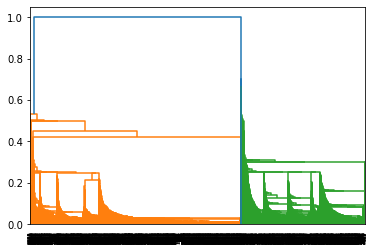

In [5]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='single'))

In [6]:
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'single')

In [7]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [8]:
Clusters

,Clusters
0,1
1,1
2,1
3,1
4,0
...,...
3994,0
3995,0
3996,0
3997,1


In [12]:
# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions

In [14]:
# Standardizing data frame (considering the numerical part of data)
airlines_1=(airlines.iloc[:,1:])

In [15]:
array =airlines_1.values
scaler = StandardScaler().fit(array)
rescaledX = scaler.transform(array)
# summarize transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])


[[-0.45 -0.19 -0.77 -0.1  -0.06 -0.7  -1.1  -0.33 -0.36  1.4  -0.77]
 [-0.54 -0.19 -0.77 -0.1  -0.06 -0.7  -1.   -0.33 -0.36  1.38 -0.77]
 [-0.32 -0.19 -0.77 -0.1  -0.06 -0.54 -0.79 -0.33 -0.36  1.41 -0.77]
 [-0.58 -0.19 -0.77 -0.1  -0.06 -0.69 -1.1  -0.33 -0.36  1.37 -0.77]
 [ 0.24 -0.19  1.41 -0.1  -0.06  1.08  1.5   1.15  0.69  1.36  1.3 ]]


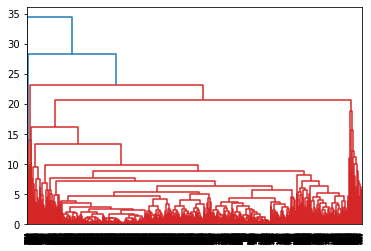

In [17]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(rescaledX, method='complete'))

# K-Means Clustering

In [18]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [20]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_airlines_df = scaler.fit_transform(airlines.iloc[:,1:])

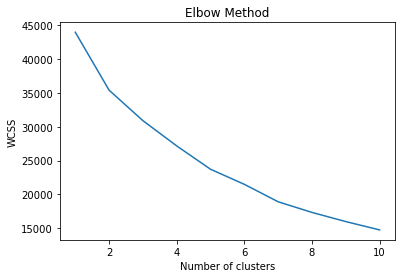

In [21]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_airlines_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [22]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(scaled_airlines_df)

KMeans(n_clusters=4, random_state=42)

In [23]:
clusters_new.labels_

array([0, 0, 0, ..., 2, 0, 0])

In [24]:
#Assign clusters to the data set
airlines['clusterid_new'] = clusters_new.labels_

In [25]:
#these are standardized values.
clusters_new.cluster_centers_

array([[-0.29, -0.06, -0.6 ,  0.03, -0.06, -0.51, -0.48, -0.19, -0.2 ,
        -0.2 , -0.35],
       [ 1.2 ,  0.82,  0.06,  0.15, -0.06,  0.58,  1.59,  3.53,  3.79,
         0.28,  0.9 ],
       [ 0.43,  0.02,  1.21, -0.08, -0.05,  0.93,  0.75, -0.08, -0.09,
         0.37,  0.59],
       [ 0.64, -0.08,  1.02, -0.1 , 15.65,  3.18,  1.71,  0.03,  0.06,
         0.24,  0.34]])

In [26]:
airlines.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2238.186083,44202.374902,96.865520,1.228694,1.019156,1.000391,4767.366302,6.957780,198.688428,0.619234,3701.567240,0.202111
1,1,1732.309091,194350.181818,778.460606,2.145455,1.036364,1.000000,31215.236364,26.890909,5404.654545,15.763636,4703.181818,0.806061
2,2,1602.838224,116671.953212,157.735131,3.716891,1.002379,1.001586,39498.719270,18.826328,342.704203,1.018239,4882.059477,0.652657
3,3,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333


In [27]:
airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


# DBSCAN Clustering

In [28]:
#Import the libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
print(airlines.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
 12  clusterid_new      3999 non-null   int32
dtypes: int32(1), int64(12)
memory usage: 390.7 KB
None


In [30]:
airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2


In [31]:
airlines.drop(['cc1_miles','cc2_miles'],axis=1,inplace=True)

In [32]:
array=airlines.values

In [33]:
array

array([[    1, 28143,     0, ...,  7000,     0,     0],
       [    2, 19244,     0, ...,  6968,     0,     0],
       [    3, 41354,     0, ...,  7034,     0,     0],
       ...,
       [ 4019, 73597,     0, ...,  1402,     1,     2],
       [ 4020, 54899,     0, ...,  1401,     0,     0],
       [ 4021,  3016,     0, ...,  1398,     0,     0]], dtype=int64)

In [34]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [35]:
X

array([[-1.74e+00, -4.51e-01, -1.86e-01, ...,  1.40e+00, -7.67e-01,
        -7.33e-01],
       [-1.73e+00, -5.39e-01, -1.86e-01, ...,  1.38e+00, -7.67e-01,
        -7.33e-01],
       [-1.73e+00, -3.20e-01, -1.86e-01, ...,  1.41e+00, -7.67e-01,
        -7.33e-01],
       ...,
       [ 1.73e+00, -4.29e-05, -1.86e-01, ..., -1.32e+00,  1.30e+00,
         1.41e+00],
       [ 1.73e+00, -1.86e-01, -1.86e-01, ..., -1.32e+00, -7.67e-01,
        -7.33e-01],
       [ 1.73e+00, -7.01e-01, -1.86e-01, ..., -1.32e+00, -7.67e-01,
        -7.33e-01]])

In [36]:
dbscan = DBSCAN(eps=0.8, min_samples=6)
dbscan.fit(X)

DBSCAN(eps=0.8, min_samples=6)

In [37]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, ..., 2, 0, 0], dtype=int64)

In [38]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [39]:
cl

,cluster
0,0
1,0
2,0
3,0
4,-1
...,...
3994,1
3995,1
3996,2
3997,0


In [40]:
pd.concat([airlines,cl],axis=1)

,ID#,Balance,Qual_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new,cluster
0,1,28143,0,1,174,1,0,0,7000,0,0,0
1,2,19244,0,1,215,2,0,0,6968,0,0,0
2,3,41354,0,1,4123,4,0,0,7034,0,0,0
3,4,14776,0,1,500,1,0,0,6952,0,0,0
4,5,97752,0,1,43300,26,2077,4,6935,1,2,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,8525,4,200,1,1403,1,0,1
3995,4018,64385,0,1,981,5,0,0,1395,1,0,1
3996,4019,73597,0,1,25447,8,0,0,1402,1,2,2
3997,4020,54899,0,1,500,1,500,1,1401,0,0,0


# Crime Data

# Hierarchical Clustering data

In [30]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [31]:
crimedata = pd.read_csv("crime_data.csv")
#C:\Users\acer\Documents\Excel r\Assignments\Clustering\crime_data.csv

In [32]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [33]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(crimedata.iloc[:,1:])

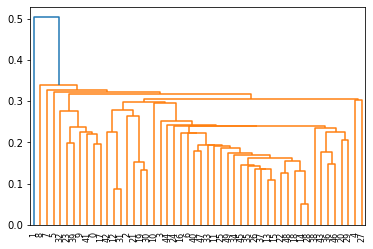

In [34]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='single'))

In [35]:
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'single')

In [36]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [37]:
Clusters

,Clusters
0,0
1,3
2,0
3,0
4,0
5,0
6,0
7,1
8,2
9,0


In [38]:
# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions

In [39]:
# Standardizing data frame (considering the numerical part of data)
crimedata_1=(crimedata.iloc[:,2:])

In [40]:
crimedata_1

,Assault,UrbanPop,Rape
0,236,58,21.2
1,263,48,44.5
2,294,80,31.0
3,190,50,19.5
4,276,91,40.6
5,204,78,38.7
6,110,77,11.1
7,238,72,15.8
8,335,80,31.9
9,211,60,25.8


In [41]:
array =crimedata_1.values
scaler = StandardScaler().fit(array)
rescaledX = scaler.transform(array)
# summarize transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])


[[ 0.79 -0.53 -0.  ]
 [ 1.12 -1.22  2.51]
 [ 1.49  1.01  1.05]
 [ 0.23 -1.08 -0.19]
 [ 1.28  1.78  2.09]]


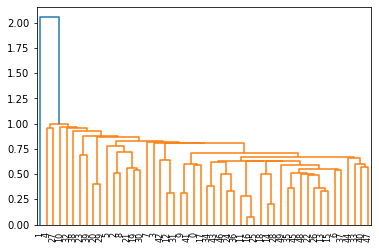

In [42]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(rescaledX, method='single'))

# K means Clustering

In [43]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [45]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_crimedata_df = scaler.fit_transform(crimedata.iloc[:,2:])

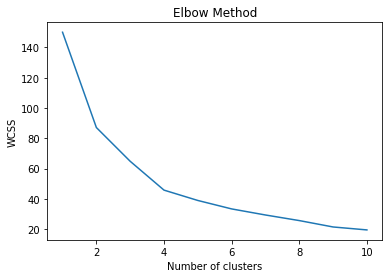

In [46]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_crimedata_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Here from this graph we consider minimum 4 clusters.

In [47]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(scaled_crimedata_df)

KMeans(n_clusters=4, random_state=42)

In [48]:
clusters_new.labels_

array([3, 2, 2, 3, 2, 2, 0, 0, 2, 3, 0, 1, 2, 0, 1, 0, 1, 3, 1, 2, 0, 2,
       1, 3, 0, 1, 1, 2, 1, 0, 2, 2, 3, 1, 0, 0, 0, 0, 0, 3, 1, 3, 0, 0,
       1, 0, 0, 1, 1, 0])

In [49]:
#Assign clusters to the data set
crimedata['clusterid_new'] = clusters_new.labels_

In [50]:
#these are standardized values.
clusters_new.cluster_centers_

array([[-0.32,  0.59, -0.17],
       [-1.12, -0.94, -0.98],
       [ 1.2 ,  0.74,  1.41],
       [ 0.88, -0.82,  0.02]])

In [51]:
crimedata.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,6.233333,144.500000,74.000000,19.677778
1,1,3.600000,78.538462,52.076923,12.176923
2,2,10.809091,269.727273,76.181818,34.345455
3,3,13.937500,243.625000,53.750000,21.412500


In [52]:
crimedata

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid_new
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,3
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,3


In [53]:
#Import the libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
print(crimedata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     50 non-null     object 
 1   Murder         50 non-null     float64
 2   Assault        50 non-null     int64  
 3   UrbanPop       50 non-null     int64  
 4   Rape           50 non-null     float64
 5   clusterid_new  50 non-null     int32  
dtypes: float64(2), int32(1), int64(2), object(1)
memory usage: 2.3+ KB
None


In [55]:
crimedata_1.head()

,Assault,UrbanPop,Rape
0,236,58,21.2
1,263,48,44.5
2,294,80,31.0
3,190,50,19.5
4,276,91,40.6


In [56]:
array=crimedata_1.values

In [57]:
array

array([[236. ,  58. ,  21.2],
       [263. ,  48. ,  44.5],
       [294. ,  80. ,  31. ],
       [190. ,  50. ,  19.5],
       [276. ,  91. ,  40.6],
       [204. ,  78. ,  38.7],
       [110. ,  77. ,  11.1],
       [238. ,  72. ,  15.8],
       [335. ,  80. ,  31.9],
       [211. ,  60. ,  25.8],
       [ 46. ,  83. ,  20.2],
       [120. ,  54. ,  14.2],
       [249. ,  83. ,  24. ],
       [113. ,  65. ,  21. ],
       [ 56. ,  57. ,  11.3],
       [115. ,  66. ,  18. ],
       [109. ,  52. ,  16.3],
       [249. ,  66. ,  22.2],
       [ 83. ,  51. ,   7.8],
       [300. ,  67. ,  27.8],
       [149. ,  85. ,  16.3],
       [255. ,  74. ,  35.1],
       [ 72. ,  66. ,  14.9],
       [259. ,  44. ,  17.1],
       [178. ,  70. ,  28.2],
       [109. ,  53. ,  16.4],
       [102. ,  62. ,  16.5],
       [252. ,  81. ,  46. ],
       [ 57. ,  56. ,   9.5],
       [159. ,  89. ,  18.8],
       [285. ,  70. ,  32.1],
       [254. ,  86. ,  26.1],
       [337. ,  45. ,  16.1],
       [ 4

In [58]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [59]:
X

array([[ 0.79, -0.53, -0.  ],
       [ 1.12, -1.22,  2.51],
       [ 1.49,  1.01,  1.05],
       [ 0.23, -1.08, -0.19],
       [ 1.28,  1.78,  2.09],
       [ 0.4 ,  0.87,  1.88],
       [-0.74,  0.8 , -1.09],
       [ 0.82,  0.45, -0.59],
       [ 1.99,  1.01,  1.15],
       [ 0.49, -0.39,  0.49],
       [-1.51,  1.22, -0.11],
       [-0.62, -0.81, -0.76],
       [ 0.95,  1.22,  0.3 ],
       [-0.7 , -0.04, -0.03],
       [-1.39, -0.6 , -1.07],
       [-0.68,  0.03, -0.35],
       [-0.75, -0.94, -0.53],
       [ 0.95,  0.03,  0.1 ],
       [-1.06, -1.01, -1.45],
       [ 1.57,  0.1 ,  0.71],
       [-0.26,  1.36, -0.53],
       [ 1.02,  0.59,  1.5 ],
       [-1.2 ,  0.03, -0.68],
       [ 1.07, -1.5 , -0.45],
       [ 0.09,  0.31,  0.75],
       [-0.75, -0.88, -0.52],
       [-0.83, -0.25, -0.51],
       [ 0.98,  1.08,  2.67],
       [-1.38, -0.67, -1.27],
       [-0.14,  1.64, -0.26],
       [ 1.38,  0.31,  1.17],
       [ 1.01,  1.43,  0.53],
       [ 2.02, -1.43, -0.55],
       [-1

In [60]:
dbscan = DBSCAN(eps=0.8, min_samples=6)
dbscan.fit(X)

DBSCAN(eps=0.8, min_samples=6)

In [61]:
#Noisy samples are given the label -1.
dbscan.labels_

array([-1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  0, -1,  0,  0,  0,  0,
       -1,  0, -1, -1, -1,  0, -1,  0,  0,  0, -1, -1, -1, -1, -1, -1,  0,
        0,  0,  0,  0, -1, -1,  0, -1, -1,  0, -1,  0,  0,  0,  0,  0],
      dtype=int64)

In [62]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [63]:
cl

,cluster
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,0
7,-1
8,-1
9,-1


In [65]:
pd.concat([crimedata,cl],axis=1)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid_new,cluster
0,Alabama,13.2,236,58,21.2,3,-1
1,Alaska,10.0,263,48,44.5,2,-1
2,Arizona,8.1,294,80,31.0,2,-1
3,Arkansas,8.8,190,50,19.5,3,-1
4,California,9.0,276,91,40.6,2,-1
5,Colorado,7.9,204,78,38.7,2,-1
6,Connecticut,3.3,110,77,11.1,0,0
7,Delaware,5.9,238,72,15.8,0,-1
8,Florida,15.4,335,80,31.9,2,-1
9,Georgia,17.4,211,60,25.8,3,-1
